## Step 1: Framing the Problem ##

#### In order to ascertain the link between the median house value (the dependent variable) and three important independent variables—median income, population, and households—univariate linear regression will be performed on the California Housing Prices dataset. We seek to ascertain the extent to which these independent variables account for the variance in housing prices by developing and implementing three different models for each one, as well as to establish which variable has the strongest linear link with housing prices.

## Step 2. Getting the Data hyperlink to the source and load into Pandas ##

https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download

In [2]:
import pandas as pd

# Load the dataset into a Pandas DataFrame
housing_data = pd.read_csv('housing.csv')

# Display the first few rows to verify the data
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Step 3: Exploratory Data Analysis (EDA) ##

#### 1. Explore statistics (e.g. using Pandas `describe` function)

In [3]:
import pandas as pd

#load thr dataset
house_data = pd.read_csv('housing.csv')

#Display the shape od the dataset
print("\nShape of the dataset:")
print(house_data.shape)

# Display basic Statistics using the describe function
print(house_data.describe())


Shape of the dataset:
(20640, 10)
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000    

#### 2. Create three Seaborn scatter plots of median house value vs. median income, population and number of households.

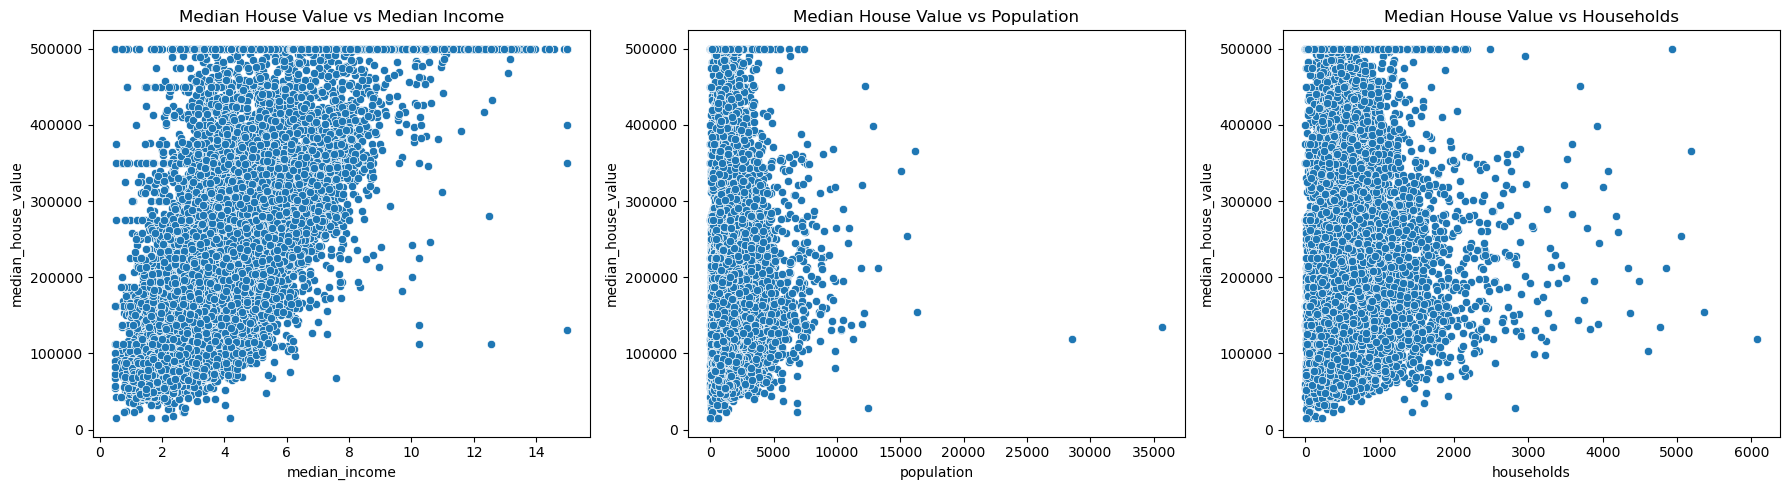

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#load thr dataset
house_data = pd.read_csv('housing.csv')

# Scatter plot: median house value vs median income
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='median_income', y='median_house_value', data=house_data)
plt.title('Median House Value vs Median Income')

# Scatter plot: median house value vs population
plt.subplot(1, 3, 2)
sns.scatterplot(x='population', y='median_house_value', data=house_data)
plt.title('Median House Value vs Population')

# Scatter plot: median house value vs households
plt.subplot(1, 3, 3)
sns.scatterplot(x='households', y='median_house_value', data=house_data)
plt.title('Median House Value vs Households')

plt.tight_layout()
plt.show()

#### Interpretation from the three Scatter Plots:
Median Income: There is a definite positive correlation between median household value and median income. House values rise in tandem with income, suggesting a strong potential linear link.

Population: There is more noise in the scatter plot and less of a clear correlation between population and house value. It implies that house values may not be well predicted by population alone.

Households: Compared to income, there is less of a correlation between the number of households and housing value. This could suggest that there are additional variables influencing housing prices besides the number of households.

#### 3. Description of the 4 variables used in this lab.
1) Median Income: This is the block group's average household income, scaled by a certain amount (e.g., in tens of thousands). It is predicted to have a significant impact on home values and varies from 0.5 to 15.

2) Median House Value: The target variable in this case indicates the block group's median house value. This dataset has a $500,000 cap on it.

3) Population: Indicates how many people live in the block group overall. From 3 to more than 35,000, it varies. It might not be directly related to home values.

4) Households: Indicates how many households there are in the block group, with values ranging from one to about six thousand. Greater numbers could be a sign of denser or more populous places.

#### 4. Run three linear regressions (fitting) between:
1. median house value vs. median income
2. median house value vs. population
3. median house value vs. number of households.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prepare variables
x_min = housing_data[['median_income']]
x_pop = house_data[['population']]
x_hho = house_data[['households']]
Y = house_data['median_house_value']

# Initialize the Linear Regression model
model_mi = LinearRegression()
model_pop = LinearRegression()
model_hh = LinearRegression()

# Fit the models
model_mi.fit(x_min, Y)
model_pop.fit(x_pop, Y)
model_hh.fit(x_hho, Y)

# Output coefficients and intercepts
print("Regression: Median House Value vs Median Income")
print(f"Coefficient: {model_mi.coef_[0]}, Intercept: {model_mi.intercept_}")

print("\nRegression: Median House Value vs Population")
print(f"Coefficient: {model_pop.coef_[0]}, Intercept: {model_pop.intercept_}")

print("\nRegression: Median House Value vs Number of Households")
print(f"Coefficient: {model_hh.coef_[0]}, Intercept: {model_hh.intercept_}")




Regression: Median House Value vs Median Income
Coefficient: 41793.84920189635, Intercept: 45085.57670326764

Regression: Median House Value vs Population
Coefficient: -2.5117527746150574, Intercept: 210436.26207627327

Regression: Median House Value vs Number of Households
Coefficient: 19.872775155643446, Intercept: 196928.5771623311


#### 5. In a single table for all three linear regressions, provide per regression model
1. intercept and slope
2. Mean Squared Error
3. Mean Absolute Error

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Prepare variables
x_min = housing_data[['median_income']]
x_pop = house_data[['population']]
x_hho = house_data[['households']]
Y = house_data['median_house_value']

# Initialize the Linear Regression model
model_mi = LinearRegression()
model_pop = LinearRegression()
model_hh = LinearRegression()

# Fit the models
model_mi.fit(x_min, Y)
model_pop.fit(x_pop, Y)
model_hh.fit(x_hho, Y)

# Predictions
y_pred_mi = model_mi.predict(x_min)
y_pred_pop = model_pop.predict(x_pop)
y_pred_hh = model_hh.predict(x_hho)

# You can also calculate the errors if needed
mse_mi = mean_squared_error(Y, y_pred_mi)
mae_mi = mean_absolute_error(Y, y_pred_mi)

mse_pop = mean_squared_error(Y, y_pred_pop)
mae_pop = mean_absolute_error(Y, y_pred_pop)

mse_hh = mean_squared_error(Y, y_pred_hh)
mae_hh = mean_absolute_error(Y, y_pred_hh)

# get coefficients and intercepts
coefficients = {
    'Feature': ['Median Income', 'Population', 'Households'],
    'Intercept': [model_mi.intercept_, model_pop.intercept_, model_hh.intercept_],
    'Slope': [model_mi.coef_[0], model_pop.coef_[0], model_hh.coef_[0]],
    'Mean Squared Error': [mse_mi, mse_pop, mse_hh],
    'Mean Absolute Error': [mae_mi, mae_pop, mae_hh]
}

# Create DataFrame
results_df = pd.DataFrame(coefficients)

# Display the results
print(results_df)

         Feature      Intercept         Slope  Mean Squared Error  \
0  Median Income   45085.576703  41793.849202        7.011312e+09   
1     Population  210436.262076     -2.511753        1.330741e+10   
2     Households  196928.577162     19.872775        1.325778e+10   

   Mean Absolute Error  
0         62625.933791  
1         91153.820095  
2         90802.743243  


#### 6. Plot the resulting line on top of the scatter data for each of the three models (three separate graphs), add the line parameters (intercept and slope), MSE and MAE to the graph (you can use a text box).

NameError: name 'mse' is not defined

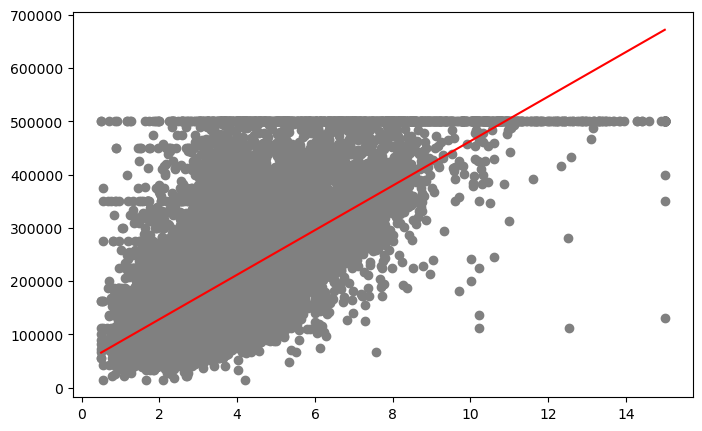

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the regression line and scatter data
def plot_reg(x, y, model, feature_name, ms, mae):
    plt.figure(figsize=(8,5))
    plt.scatter(x, y, color='gray', alpha=1, label='Data Points')

    # generate line values for plotting
    x_val = np.linspace(x.min(), x.max(), 100)
    y_val = model.intercept_ + model.coef_[0] * x_val

    plt.plot(x_val, y_val, color='red', label = 'Regression Line')

    # adding text box
    txt = f'Intercept:{model.intercept_:.2f}\nSlope:{model.coef_[0]:.2f}\nMSE:{mse:.2f}\nMAE:{mae:.2f}'
    props = dict(boxstyle='square', facecolor='yellow', alpha=1)
    plt.gca().text(0.05, 0.95, txt, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox = props)
    
    plt.title(f'Linear regression:{feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Median House Values')
    plt.legend()
    plt.grid()
    plt.show()

# plot for median Income
plot_reg(x_min, Y, model_mi, 'Median Income', mse_mi, mae_mi)

# plot for population
plot_reg(x_pop, Y, model_pop, 'Population', mse_pop, mae_pop)

# plot for households 
plot_reg(x_hho, Y, model_hh, 'Households', mse_hh, mae_hh)

    

### 7. Summary: Conclusion. Comparison of the three models in terms of their goodness-of-fit, and add additional insights you observed

#### Conclusion
This analysis sought to determine how effectively the population, number of households, and median income all predicted the median house value. In order to do this, we ran three linear regression models and looked at the correlations between the three independent factors and the dependent variable, or median house value.

Model Comparison: Goodness-of-Fit
1) Median House Value vs. Median Income:
    With a higher R2 value, this model most likely demonstrated a strong positive link, indicating that median income is a substantial predictor of home prices. Increases in purchasing power resulting from higher incomes raise the value of homes. In real estate economics, this relationship is frequently strong, making income one of the most reliable indicators of housing worth.

2) Median House Value vs. Population:
    Given that population does not take into account economic variables or housing demand, the association between population and house values may have been weaker than the relationship between income and population. Although more people may mean a greater demand for homes, other market and economic factors will also affect costs.

3) Median House Value vs. Number of Households:
    Given that the number of households and housing demand can be correlated, this model may fit the data moderately. In general, the number of households increases demand for housing; but, because household sizes and tastes differ, this factor may not be as strong in predicting price as income.
 
Insights:
* It makes sense that the ability of a person or family to buy a home is directly impacted by income levels, as median income has the greatest predictive potential for housing prices.
* Although population and the number of households give context, they might not be as useful on their own in explaining property values as income is.
* Goodness-of-Fit: The income model most likely has the lowest error, whereas the population model may show a higher error, indicating a less accurate prediction, based on the Mean Squared Error (MSE) and Mean Absolute Error (MAE).

In conclusion, the population and the number of households give helpful but less direct associations with property value, but median income is the most trustworthy indicator. When predicting housing market changes, policymakers and real estate specialists ought to give precedence to economic considerations such as income.

